# WeatherPy


#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [3]:
# Save Config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build a partial querry URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Test Cities
test_cities = ["Minneapolis", "Chicago", "Rochester", "Duluth"]

# Set up list to hold response info
City_ID = 0
CityID = []
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

print("Beginning Data Retrieval")
print("-------------------------------")

# Loop through the list of cities and perform a request for data on each
for i in cities:
    
    # Create search query, make request and store in json
    query= query_url + i
    response = requests.get(query)
    weather_json = response.json()
    
   
    # Try to grab the list information
    try:
        City.append(weather_json['name'])
        Cloudiness.append(weather_json['clouds']['all'])
        Country.append(weather_json['sys']['country'])
        Date.append(weather_json['dt'])
        Humidity.append(weather_json['main']['humidity'])
        Lat.append(weather_json['coord']['lat'])
        Lng.append(weather_json['coord']['lon'])
        Max_Temp.append(weather_json['main']['temp_max'])
        Wind_Speed.append(weather_json['wind']['speed'])
        City_ID = City_ID + 1
        time.sleep(1)
        print(f"Processing Record {City_ID} | {i}")
        
    
    # Handle exceptions for missing data
    except:
        City_ID = City_ID + 1
        print("City not found. Skipping...")
        pass

Beginning Data Retrieval
-------------------------------
Processing Record 1 | ulaangom
Processing Record 2 | vaini
Processing Record 3 | coihaique
Processing Record 4 | verkhovyna
Processing Record 5 | new norfolk
Processing Record 6 | belmonte
Processing Record 7 | basco
Processing Record 8 | bambanglipuro
Processing Record 9 | ushuaia
Processing Record 10 | geraldton
Processing Record 11 | quatre cocos
Processing Record 12 | itarema
Processing Record 13 | atuona
Processing Record 14 | busselton
Processing Record 15 | coahuayana
Processing Record 16 | hobart
Processing Record 17 | mataura
Processing Record 18 | fare
Processing Record 19 | dikson
Processing Record 20 | kodiak
Processing Record 21 | araouane
Processing Record 22 | raudeberg
Processing Record 23 | coquimbo
Processing Record 24 | lewistown
Processing Record 25 | punta arenas
Processing Record 26 | victoria
Processing Record 27 | altay
Processing Record 28 | grindavik
City not found. Skipping...
Processing Record 30 | ver

Processing Record 251 | davila
Processing Record 252 | kjollefjord
Processing Record 253 | paamiut
Processing Record 254 | port elizabeth
Processing Record 255 | tautira
Processing Record 256 | nachingwea
Processing Record 257 | tuatapere
Processing Record 258 | luanda
Processing Record 259 | ulladulla
Processing Record 260 | anadyr
Processing Record 261 | limbang
Processing Record 262 | dovolnoye
Processing Record 263 | fortuna
Processing Record 264 | alyangula
Processing Record 265 | galesong
Processing Record 266 | kota kinabalu
Processing Record 267 | gurupi
Processing Record 268 | maldonado
Processing Record 269 | tangier
Processing Record 270 | broome
Processing Record 271 | meulaboh
Processing Record 272 | andenes
Processing Record 273 | homer
Processing Record 274 | norman wells
Processing Record 275 | ossora
City not found. Skipping...
Processing Record 277 | magan
Processing Record 278 | anchorage
Processing Record 279 | pevek
Processing Record 280 | ribeira grande
Processing

Processing Record 504 | stende
Processing Record 505 | soure
Processing Record 506 | puerto quijarro
Processing Record 507 | shimoda
Processing Record 508 | katsuura
Processing Record 509 | shumskiy
Processing Record 510 | gien
Processing Record 511 | sao filipe
Processing Record 512 | xudat
Processing Record 513 | nuuk
Processing Record 514 | north bend
Processing Record 515 | arraial do cabo
Processing Record 516 | brus laguna
Processing Record 517 | chekhov
Processing Record 518 | soyo
Processing Record 519 | tacarigua
Processing Record 520 | chuy
Processing Record 521 | sokoto
Processing Record 522 | san borja
Processing Record 523 | trenggalek
Processing Record 524 | port hedland
Processing Record 525 | port moresby
City not found. Skipping...
Processing Record 527 | indapur
Processing Record 528 | shar
Processing Record 529 | havre-saint-pierre
Processing Record 530 | komsomolskiy
Processing Record 531 | price
Processing Record 532 | balaipungut
Processing Record 533 | vao
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Convert raw data to DataFrame
cities_df = pd.DataFrame({
    'City': City,
    'Lat': Lat,
    'Lng': Lng,
    'Max Temp': Max_Temp,
    'Humidity': Humidity,
    'Cloudiness': Cloudiness,
    'Wind Speed': Wind_Speed,
    'Country': Country,
    'Date': Date
})

# Export the city data into a .csv
cities_df.to_csv(r'C:\Users\weber\Desktop\python-api-challenge\python-api-challenge\WeatherPy\cities.csv', header=True)

# Display the DataFrame
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ulaangom,49.9811,92.0667,6.13,87,72,3.24,MN,1612903780
1,Vaini,-21.2000,-175.2000,80.60,89,90,21.85,TO,1612903781
2,Coyhaique,-45.5752,-72.0662,89.60,27,40,6.91,CL,1612903689
3,Verkhovyna,48.1557,24.7911,37.18,86,97,3.38,UA,1612903783
4,New Norfolk,-42.7826,147.0587,52.00,67,18,1.68,AU,1612903784


In [14]:
# Reduce the DataFrame and analize
reduced_cities_df = cities_df.drop(columns=['City', 'Country'])

reduced_cities_df.describe(percentiles=[0.25, 0.5, 0.75]).head(10)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,19.520478,21.692039,50.343097,73.756055,55.761246,8.263581,1.612904e+09
std,33.034436,90.314745,32.334963,20.065862,38.983689,6.069676,2.097683e+02
min,-54.800000,-175.200000,-38.200000,1.000000,0.000000,0.310000,1.612904e+09
25%,-7.923675,-57.263475,26.700000,65.000000,20.000000,3.440000,1.612904e+09
50%,20.705800,24.729900,62.735000,79.000000,75.000000,6.910000,1.612904e+09
75%,48.539925,104.854625,77.000000,88.000000,93.000000,11.450000,1.612904e+09
max,78.218600,179.316700,95.000000,100.000000,100.000000,41.900000,1.612904e+09


## Inspect the data and remove the cities where the humidity > 100%.

Skip this step if there are no cities that have humidity > 100%. 

In [15]:
# max humidity is 100%.
reduced_cities_df.describe(percentiles=[0.25, 0.5, 0.75]).head(10)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,19.520478,21.692039,50.343097,73.756055,55.761246,8.263581,1.612904e+09
std,33.034436,90.314745,32.334963,20.065862,38.983689,6.069676,2.097683e+02
min,-54.800000,-175.200000,-38.200000,1.000000,0.000000,0.310000,1.612904e+09
25%,-7.923675,-57.263475,26.700000,65.000000,20.000000,3.440000,1.612904e+09
50%,20.705800,24.729900,62.735000,79.000000,75.000000,6.910000,1.612904e+09
75%,48.539925,104.854625,77.000000,88.000000,93.000000,11.450000,1.612904e+09
max,78.218600,179.316700,95.000000,100.000000,100.000000,41.900000,1.612904e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

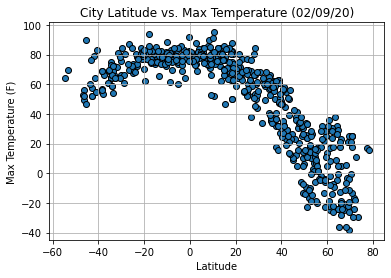

In [20]:
# Build a scatter plot 
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (02/09/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsTemperature.png")

# Show plot
plt.show()

This scatter plot shows the relationship between maximum temperature and latitude
measured in 578 total cities on February 9, 2020.

## Latitude vs. Humidity Plot

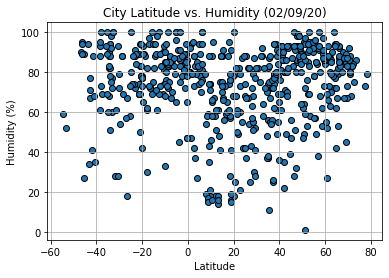

In [21]:
# Build a scatter plot 
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (02/09/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsHumidity.png")

# Show plot
plt.show()

This scatter plot shows the relationship between humidity percentage and latitude
measured in 578 total cities on February 9, 2020.

## Latitude vs. Cloudiness Plot

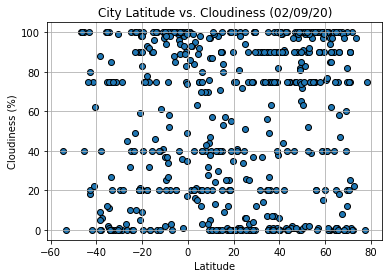

In [22]:
# Build a scatter plot 
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (02/09/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsCloudiness.png")

# Show plot
plt.show()

This scatter plot shows the relationship between cloudiness percentage and latitude
measured in 578 total cities on February 9, 2020.

## Latitude vs. Wind Speed Plot

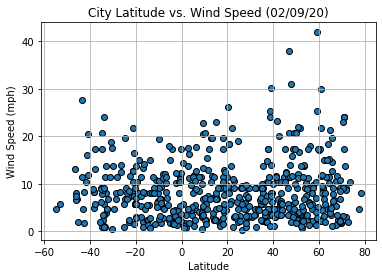

In [23]:
# Build a scatter plot 
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (02/09/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsWindSpeed.png")

# Show plot
plt.show()

This scatter plot shows the relationship between wind speed and latitude
measured in 578 total cities on February 9, 2020.

## Linear Regression

In [29]:
# Separate DataFrame into Northern and Southern Hemisphere
north_df = cities_df.loc[(cities_df["Lat"] >= 0)]

south_df = cities_df.loc[(cities_df["Lat"] < 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Vaini,-21.2000,-175.2000,80.60,89,90,21.85,TO,1612903781
2,Coyhaique,-45.5752,-72.0662,89.60,27,40,6.91,CL,1612903689
4,New Norfolk,-42.7826,147.0587,52.00,67,18,1.68,AU,1612903784
5,Belmonte,-15.8631,-38.8828,80.60,69,40,8.05,BR,1612903785
7,Bambanglipuro,-7.9500,110.2833,77.00,87,100,4.83,ID,1612903788
...,...,...,...,...,...,...,...,...,...
556,Vryburg,-26.9566,24.7284,73.72,57,3,8.28,ZA,1612904433
558,Pamanukan,-6.2842,107.8106,76.24,87,88,6.96,ID,1612904436
567,Mollendo,-17.0231,-72.0147,74.62,73,32,8.39,PE,1612904448
574,Mayor Pablo Lagerenza,-19.9309,-60.7718,83.17,42,98,13.71,PY,1612904457


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.783643453395785


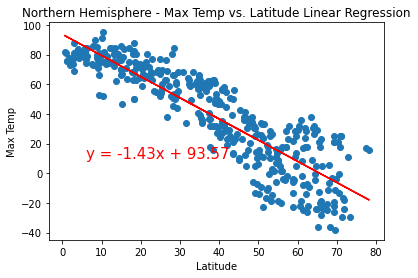

In [30]:
# Plot out Max Temp vs Lat in scatter plot
# Add the linear regression equation and line to the plot
# Print out the r-squared value along with the plot
x_values = north_df['Lat']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

This linear regression shows a negative correlaton between latitude and max temperature.
For every one degree change in latitute the max temperature is expected to decrease by
1.44 degrees fahrenheit. The r-square measurement indicates latitude explains 78% of
variance in max temperatures. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression